In [1]:
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.optimizers import Adam, SGD
from keras.preprocessing import image
import keras.backend as K
from keras.utils import np_utils
from keras.datasets import cifar10
import numpy as np
import cv2
import sys
import keras

Using TensorFlow backend.


In [2]:
# The data, shuffled and split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert class vectors to binary class matrices.
Ytrain = np_utils.to_categorical(y_train, 10)
Ytest = np_utils.to_categorical(y_test, 10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Xtrain = preprocess_input(X_train)
Xtest = preprocess_input(X_test)

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-ih_yawv_
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-ih_yawv_
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-qrrevka1/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
from classification_models.resnet import ResNet18, preprocess_input

In [5]:
resnet_default = ResNet18((32, 32, 3), weights='imagenet',include_top=False)

W0712 11:01:43.305757 140405506082688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 11:01:43.356555 140405506082688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 11:01:43.357880 140405506082688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 11:01:43.358885 140405506082688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0712 11:01:43.360696 140405

44924928/44920640 [==============================] - 1s 0us/step


In [0]:
from keras.layers import Activation, GlobalAveragePooling2D, Dense
from keras.models import Model
x = GlobalAveragePooling2D() (resnet_default.output)
x = Dense(10) (x)
out = Activation('softmax') (x)

In [8]:
our_model=Model(inputs=resnet_default.input, outputs=out)
our_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [9]:
our_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
our_model.fit(Xtrain, Ytrain, batch_size=64, nb_epoch=10, validation_data=(Xtest, Ytest), shuffle=True)

W0712 11:05:37.839259 140405506082688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0712 11:05:37.973980 140405506082688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 31s 611us/step - loss: 1.0595 - acc: 0.6362 - val_loss: 0.7922 - val_acc: 0.7251
Epoch 2/10
50000/50000 [==============================] - 25s 496us/step - loss: 0.6595 - acc: 0.7709 - val_loss: 0.7017 - val_acc: 0.7578
Epoch 3/10
50000/50000 [==============================] - 25s 495us/step - loss: 0.5160 - acc: 0.8194 - val_loss: 0.6707 - val_acc: 0.7730
Epoch 4/10
50000/50000 [==============================] - 25s 491us/step - loss: 0.4053 - acc: 0.8581 - val_loss: 0.6880 - val_acc: 0.7699
Epoch 5/10
50000/50000 [==============================] - 25s 492us/step - loss: 0.3143 - acc: 0.8891 - val_loss: 0.6930 - val_acc: 0.7839
Epoch 6/10
50000/50000 [==============================] - 25s 494us/step - loss: 0.2372 - acc: 0.9168 - val_loss: 0.7095 - val_acc: 0.7881
Epoch 7/10
50000/50000 [==============================] - 25s 492us/step - loss: 0.1806 - acc: 0.9371 - val_loss: 0.

In [0]:
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

In [0]:
Y_pred = our_model.predict(Xtest)

pred = np.argmax(Y_pred,axis=-1)
true = np.argmax(Ytest, axis=-1)


indices = np.asarray (np.where(pred!=true)[0])


In [12]:
index = np.random.choice(indices,50)
for i in index:
  print (i)

1779
7145
6041
1580
1908
853
5917
3115
1759
3186
9548
8504
3957
7154
9294
9683
1807
3246
3218
941
982
1605
9366
4973
8324
2165
5493
4628
1791
6213
417
370
3398
1682
1816
2486
8783
1756
474
3267
8906
5673
6134
3012
6243
1498
9043
1812
697
8598


In [17]:
misclassified = list(index)
misclassified

[1779,
 7145,
 6041,
 1580,
 1908,
 853,
 5917,
 3115,
 1759,
 3186,
 9548,
 8504,
 3957,
 7154,
 9294,
 9683,
 1807,
 3246,
 3218,
 941,
 982,
 1605,
 9366,
 4973,
 8324,
 2165,
 5493,
 4628,
 1791,
 6213,
 417,
 370,
 3398,
 1682,
 1816,
 2486,
 8783,
 1756,
 474,
 3267,
 8906,
 5673,
 6134,
 3012,
 6243,
 1498,
 9043,
 1812,
 697,
 8598]

PLOTTING ORIGINAL IMAGE: 1779, actual class: cat


<Figure size 36000x36000 with 0 Axes>

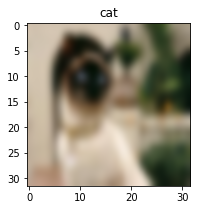

PLOTTING IMAGE: 1779, SUPERIMPOSED with HEATMAP, predicted class: bird


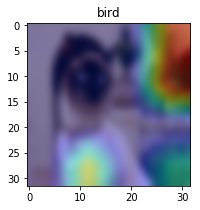

PLOTTING ORIGINAL IMAGE: 7145, actual class: cat


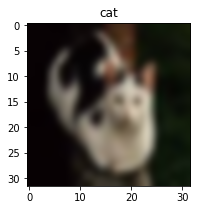

PLOTTING IMAGE: 7145, SUPERIMPOSED with HEATMAP, predicted class: dog


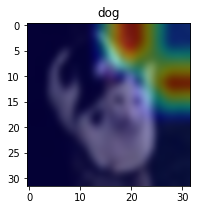

PLOTTING ORIGINAL IMAGE: 6041, actual class: horse


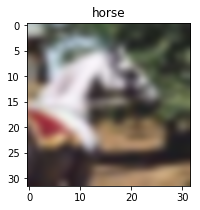

PLOTTING IMAGE: 6041, SUPERIMPOSED with HEATMAP, predicted class: automobile


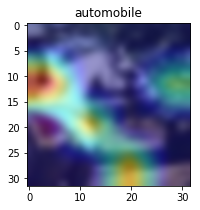

PLOTTING ORIGINAL IMAGE: 1580, actual class: frog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


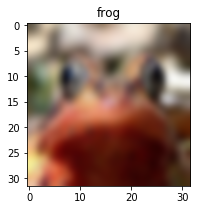

PLOTTING IMAGE: 1580, SUPERIMPOSED with HEATMAP, predicted class: dog


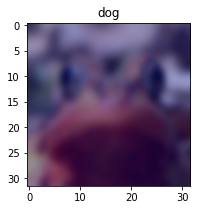

PLOTTING ORIGINAL IMAGE: 1908, actual class: dog


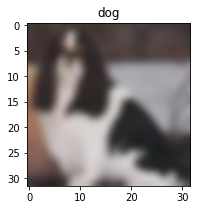

PLOTTING IMAGE: 1908, SUPERIMPOSED with HEATMAP, predicted class: cat


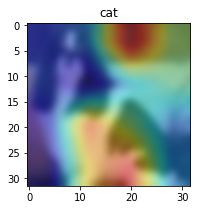

PLOTTING ORIGINAL IMAGE: 853, actual class: truck


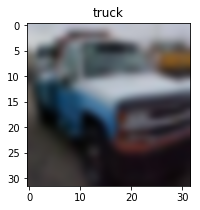

PLOTTING IMAGE: 853, SUPERIMPOSED with HEATMAP, predicted class: automobile


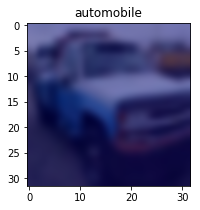

PLOTTING ORIGINAL IMAGE: 5917, actual class: cat


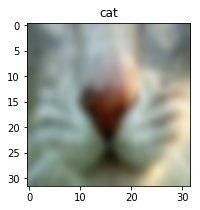

PLOTTING IMAGE: 5917, SUPERIMPOSED with HEATMAP, predicted class: bird


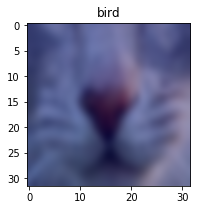

PLOTTING ORIGINAL IMAGE: 3115, actual class: dog


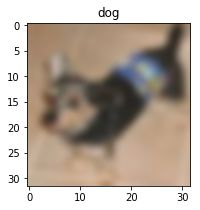

PLOTTING IMAGE: 3115, SUPERIMPOSED with HEATMAP, predicted class: airplane


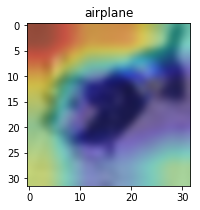

PLOTTING ORIGINAL IMAGE: 1759, actual class: dog


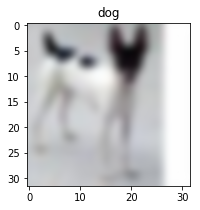

PLOTTING IMAGE: 1759, SUPERIMPOSED with HEATMAP, predicted class: cat


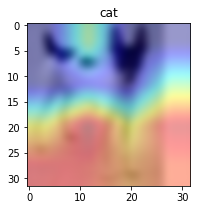

PLOTTING ORIGINAL IMAGE: 3186, actual class: horse


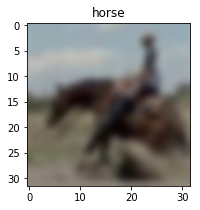

PLOTTING IMAGE: 3186, SUPERIMPOSED with HEATMAP, predicted class: deer


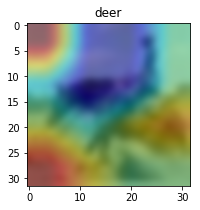

PLOTTING ORIGINAL IMAGE: 9548, actual class: bird


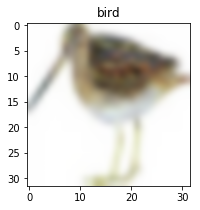

PLOTTING IMAGE: 9548, SUPERIMPOSED with HEATMAP, predicted class: cat


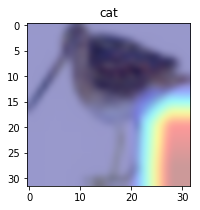

PLOTTING ORIGINAL IMAGE: 8504, actual class: automobile


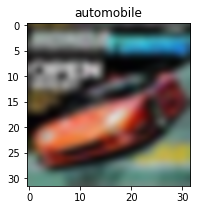

PLOTTING IMAGE: 8504, SUPERIMPOSED with HEATMAP, predicted class: ship


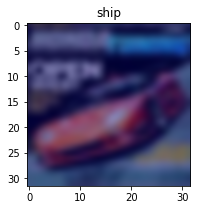

PLOTTING ORIGINAL IMAGE: 3957, actual class: truck


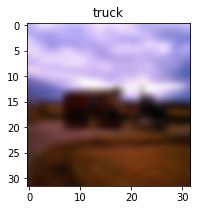

PLOTTING IMAGE: 3957, SUPERIMPOSED with HEATMAP, predicted class: ship


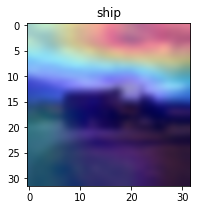

PLOTTING ORIGINAL IMAGE: 7154, actual class: airplane


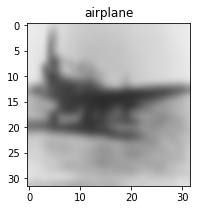

PLOTTING IMAGE: 7154, SUPERIMPOSED with HEATMAP, predicted class: ship


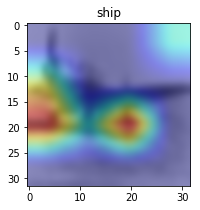

PLOTTING ORIGINAL IMAGE: 9294, actual class: frog


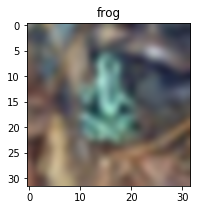

PLOTTING IMAGE: 9294, SUPERIMPOSED with HEATMAP, predicted class: truck


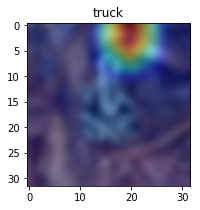

PLOTTING ORIGINAL IMAGE: 9683, actual class: frog


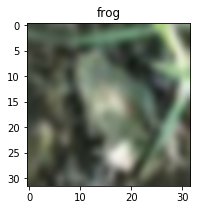

PLOTTING IMAGE: 9683, SUPERIMPOSED with HEATMAP, predicted class: cat


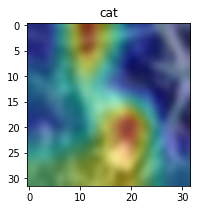

PLOTTING ORIGINAL IMAGE: 1807, actual class: dog


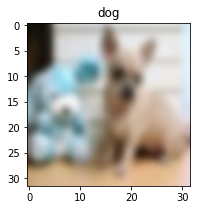

PLOTTING IMAGE: 1807, SUPERIMPOSED with HEATMAP, predicted class: cat


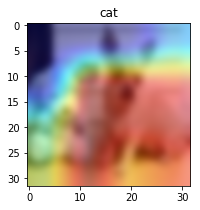

PLOTTING ORIGINAL IMAGE: 3246, actual class: automobile


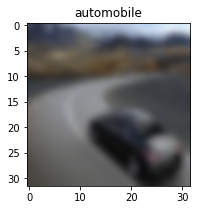

PLOTTING IMAGE: 3246, SUPERIMPOSED with HEATMAP, predicted class: horse


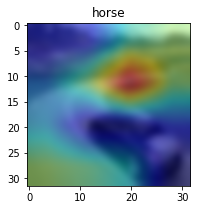

PLOTTING ORIGINAL IMAGE: 3218, actual class: truck


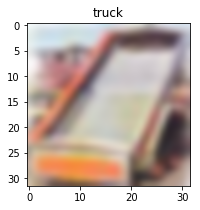

PLOTTING IMAGE: 3218, SUPERIMPOSED with HEATMAP, predicted class: ship


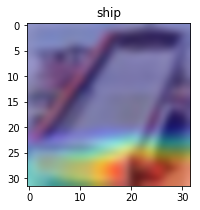

PLOTTING ORIGINAL IMAGE: 941, actual class: automobile


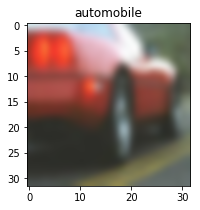

PLOTTING IMAGE: 941, SUPERIMPOSED with HEATMAP, predicted class: dog


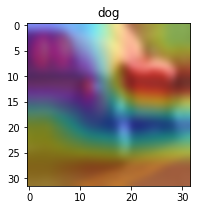

PLOTTING ORIGINAL IMAGE: 982, actual class: airplane


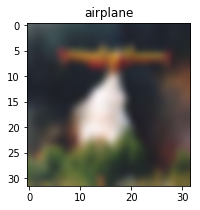

PLOTTING IMAGE: 982, SUPERIMPOSED with HEATMAP, predicted class: horse


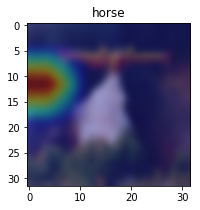

PLOTTING ORIGINAL IMAGE: 1605, actual class: cat


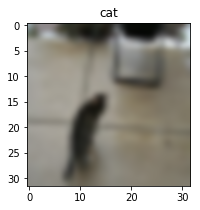

PLOTTING IMAGE: 1605, SUPERIMPOSED with HEATMAP, predicted class: bird


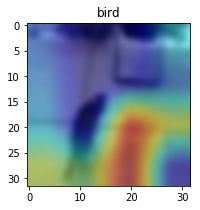

PLOTTING ORIGINAL IMAGE: 9366, actual class: bird


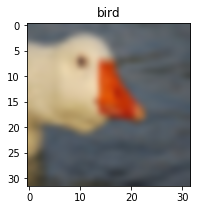

PLOTTING IMAGE: 9366, SUPERIMPOSED with HEATMAP, predicted class: ship


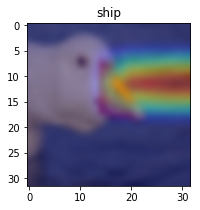

PLOTTING ORIGINAL IMAGE: 4973, actual class: automobile


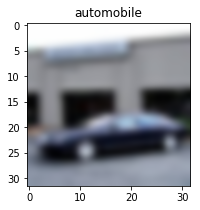

PLOTTING IMAGE: 4973, SUPERIMPOSED with HEATMAP, predicted class: airplane


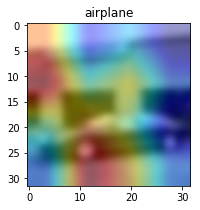

PLOTTING ORIGINAL IMAGE: 8324, actual class: cat


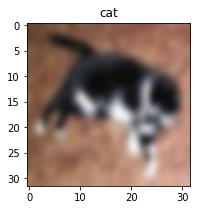

PLOTTING IMAGE: 8324, SUPERIMPOSED with HEATMAP, predicted class: dog


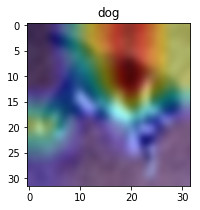

PLOTTING ORIGINAL IMAGE: 2165, actual class: bird


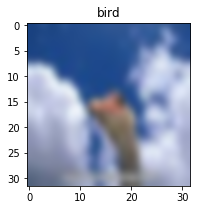

PLOTTING IMAGE: 2165, SUPERIMPOSED with HEATMAP, predicted class: horse


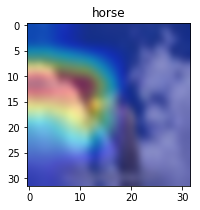

PLOTTING ORIGINAL IMAGE: 5493, actual class: cat


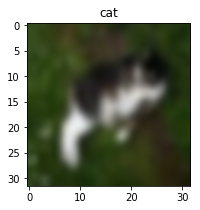

PLOTTING IMAGE: 5493, SUPERIMPOSED with HEATMAP, predicted class: airplane


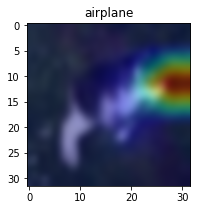

PLOTTING ORIGINAL IMAGE: 4628, actual class: dog


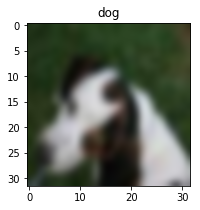

PLOTTING IMAGE: 4628, SUPERIMPOSED with HEATMAP, predicted class: horse


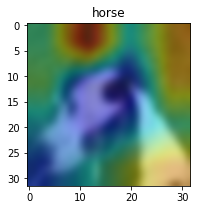

PLOTTING ORIGINAL IMAGE: 1791, actual class: deer


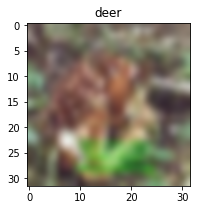

PLOTTING IMAGE: 1791, SUPERIMPOSED with HEATMAP, predicted class: frog


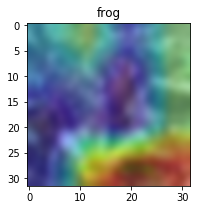

PLOTTING ORIGINAL IMAGE: 6213, actual class: cat


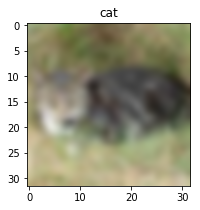

PLOTTING IMAGE: 6213, SUPERIMPOSED with HEATMAP, predicted class: frog


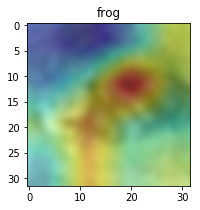

PLOTTING ORIGINAL IMAGE: 417, actual class: horse


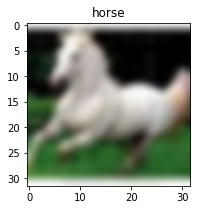

PLOTTING IMAGE: 417, SUPERIMPOSED with HEATMAP, predicted class: dog


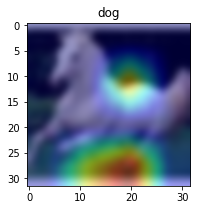

PLOTTING ORIGINAL IMAGE: 370, actual class: deer


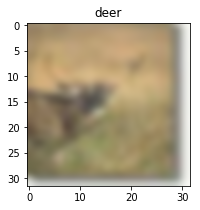

PLOTTING IMAGE: 370, SUPERIMPOSED with HEATMAP, predicted class: bird


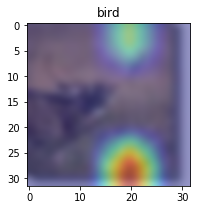

PLOTTING ORIGINAL IMAGE: 3398, actual class: bird


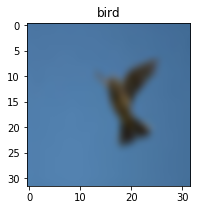

PLOTTING IMAGE: 3398, SUPERIMPOSED with HEATMAP, predicted class: airplane


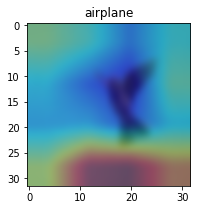

PLOTTING ORIGINAL IMAGE: 1682, actual class: horse


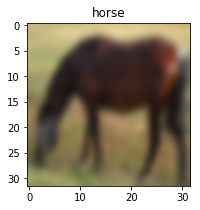

PLOTTING IMAGE: 1682, SUPERIMPOSED with HEATMAP, predicted class: deer


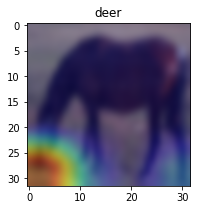

PLOTTING ORIGINAL IMAGE: 1816, actual class: horse


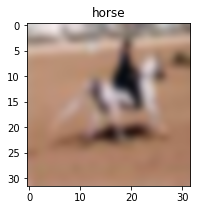

PLOTTING IMAGE: 1816, SUPERIMPOSED with HEATMAP, predicted class: airplane


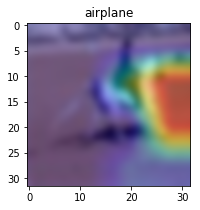

PLOTTING ORIGINAL IMAGE: 2486, actual class: horse


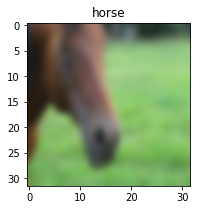

PLOTTING IMAGE: 2486, SUPERIMPOSED with HEATMAP, predicted class: bird


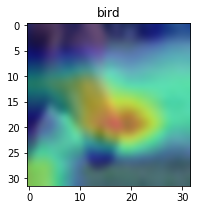

PLOTTING ORIGINAL IMAGE: 8783, actual class: frog


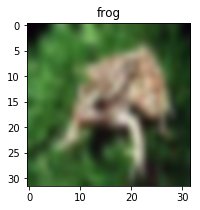

PLOTTING IMAGE: 8783, SUPERIMPOSED with HEATMAP, predicted class: dog


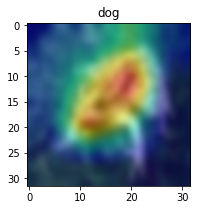

PLOTTING ORIGINAL IMAGE: 1756, actual class: bird


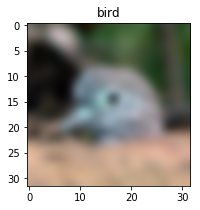

PLOTTING IMAGE: 1756, SUPERIMPOSED with HEATMAP, predicted class: dog


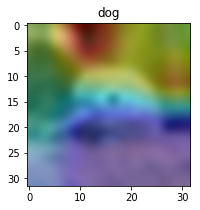

PLOTTING ORIGINAL IMAGE: 474, actual class: dog


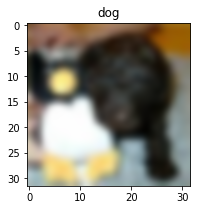

PLOTTING IMAGE: 474, SUPERIMPOSED with HEATMAP, predicted class: cat


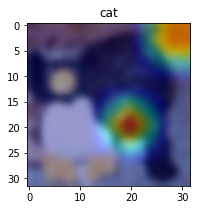

PLOTTING ORIGINAL IMAGE: 3267, actual class: cat


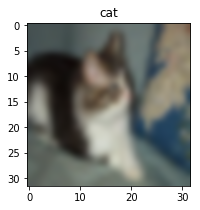

PLOTTING IMAGE: 3267, SUPERIMPOSED with HEATMAP, predicted class: dog


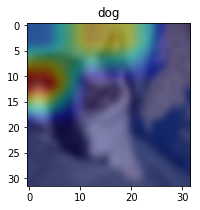

PLOTTING ORIGINAL IMAGE: 8906, actual class: deer


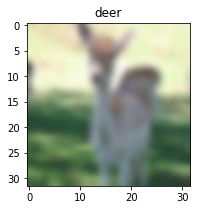

PLOTTING IMAGE: 8906, SUPERIMPOSED with HEATMAP, predicted class: bird


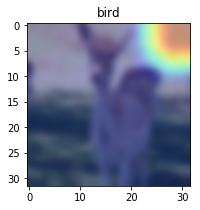

PLOTTING ORIGINAL IMAGE: 5673, actual class: dog


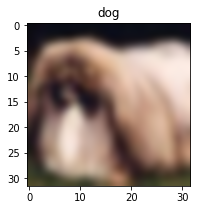

PLOTTING IMAGE: 5673, SUPERIMPOSED with HEATMAP, predicted class: horse


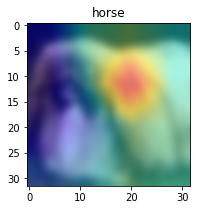

PLOTTING ORIGINAL IMAGE: 6134, actual class: cat


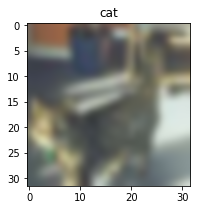

PLOTTING IMAGE: 6134, SUPERIMPOSED with HEATMAP, predicted class: ship


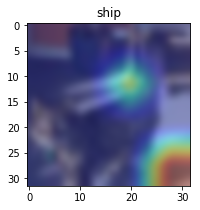

PLOTTING ORIGINAL IMAGE: 3012, actual class: automobile


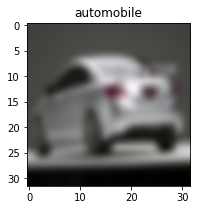

PLOTTING IMAGE: 3012, SUPERIMPOSED with HEATMAP, predicted class: truck


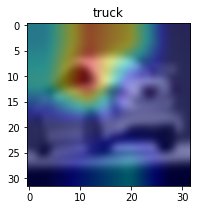

PLOTTING ORIGINAL IMAGE: 6243, actual class: deer


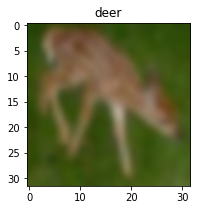

PLOTTING IMAGE: 6243, SUPERIMPOSED with HEATMAP, predicted class: bird


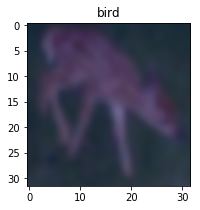

PLOTTING ORIGINAL IMAGE: 1498, actual class: dog


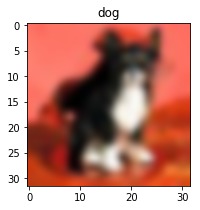

PLOTTING IMAGE: 1498, SUPERIMPOSED with HEATMAP, predicted class: cat


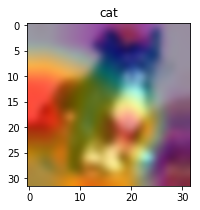

PLOTTING ORIGINAL IMAGE: 9043, actual class: cat


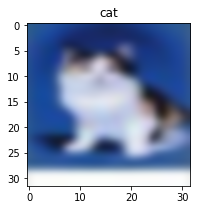

PLOTTING IMAGE: 9043, SUPERIMPOSED with HEATMAP, predicted class: dog


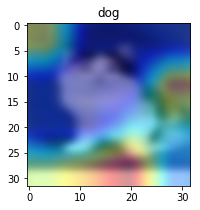

PLOTTING ORIGINAL IMAGE: 1812, actual class: dog


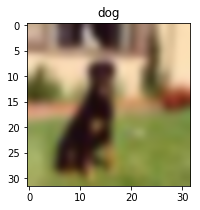

PLOTTING IMAGE: 1812, SUPERIMPOSED with HEATMAP, predicted class: bird


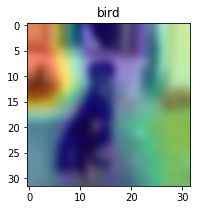

PLOTTING ORIGINAL IMAGE: 697, actual class: bird


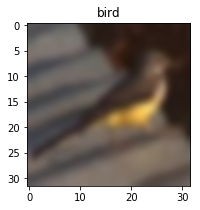

PLOTTING IMAGE: 697, SUPERIMPOSED with HEATMAP, predicted class: cat


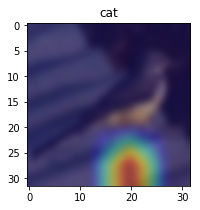

PLOTTING ORIGINAL IMAGE: 8598, actual class: cat


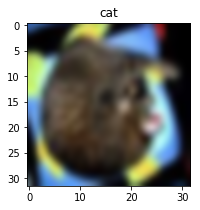

PLOTTING IMAGE: 8598, SUPERIMPOSED with HEATMAP, predicted class: bird


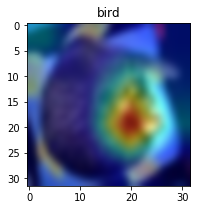

In [20]:

fig = plt.figure(figsize=(500,500))
(_, _), (X_t, Y_t) = cifar10.load_data()


for i in range(len(misclassified)):
  
    num = misclassified[i]

    x = Xtest[num].reshape(1,32,32,3)
    preds = our_model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = our_model.output[:, class_idx]
    last_conv_layer = our_model.get_layer("stage2_unit2_conv1") #stage2_unit2_conv1

    grads = K.gradients(class_output, last_conv_layer.output)[0] 
    pooled_grads = K.mean(grads, axis=(0, 1, 2)) #512
    iterate = K.function([our_model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([x])

    for i in range(128):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i] 


    heatmap = np.mean(conv_layer_output_value, axis=-1) 
    heatmap = np.maximum(heatmap, 0) 
    heatmap /= np.max(heatmap) 

    img = cv2.cvtColor(X_t[num].astype(np.uint8), cv2.COLOR_RGB2BGR)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
    
    print("PLOTTING ORIGINAL IMAGE: {}, actual class: {}".format(num,class_name[Y_t[num][0]]))
    
    plt.figure(figsize=(3,3))
    plt.title(class_name[Y_t[num][0]])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),interpolation='bicubic')
    plt.show()
   
    print("PLOTTING IMAGE: {}, SUPERIMPOSED with HEATMAP, predicted class: {}".format(num,class_name[class_idx]))
    plt.figure(figsize=(3,3))    
    plt.title(class_name[class_idx])
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB),interpolation='bicubic')
    plt.show()